<a href="https://colab.research.google.com/github/Ayushi-creator/Medical_cost/blob/main/EdaEtp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets

**Content**

---



---



**Columns**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,

objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


---



---




# Import data

As a first step, we need to have to do some Data Cleaning and EDA (exploratory data analysis).

The process of modifying data means try to find information that fits the criteria for the specific problem/objective.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns

In [6]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/Ramanand-Yadav/DataSet/main/Medical_Cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# Get columns' data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# More info about the data
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [9]:
# Remove any duplicated rows
#return a series with True and False value that describe which row in the Dataframe are duplicated and not.
s=df.drop(index=df[df.duplicated()].index, inplace=True)
print(s)

None


In [10]:
# Check for NaN/null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Finding outliers

What is an outlier?

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

What is the reason for an outlier to exists in a dataset?

Variability in the data

An experimental measurement error

What impact an outlier can bring?

skew the data,
data that create an asymmetrical,skewed on a graph

significant impact on mean

significant impact on standard deviation.

How can we identify an outlier?

using scatter plots

using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation ---> z = (X — μ) / σ

In [11]:
px.scatter(df, x='age', y='bmi', title='Age vs BMI - find outliers', color='charges', template='plotly_dark')#(providing a palette for the colors and define the new background color)


# 💡 Insights:

We can observe outliers above 45 BMI.

Is 45 BMI too much? Yes. Can we remove it? Yes

**Body Mass Index**

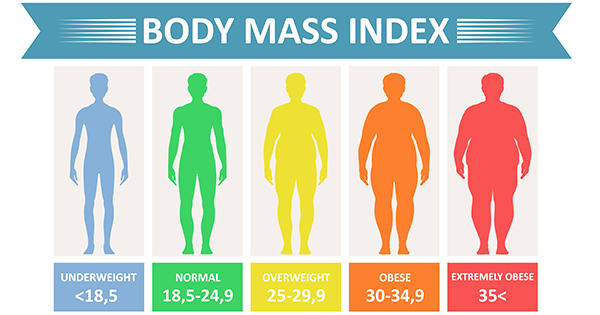

In [12]:
# We are going calculate 
numeric_col = ['bmi']

In [13]:
# Calculate the Z score
df_zscore = df[numeric_col].apply(stats.zscore).apply(abs)
df_zscore['bmi_value'] = df.bmi


In [14]:
df_zscore = df_zscore[df_zscore.bmi > 2.4].sort_values('bmi_value')
df_zscore.head()

,bmi,bmi_value
172,2.411119,15.96
1024,2.403427,45.32
582,2.421465,45.43
292,2.439504,45.54
1131,2.498538,45.90


In [15]:
# As we can see, over z score higher than 2.4 is the exactly outliers we were looking for.
# Let's drop this data from the dataframe
df2 = df.drop(index=df_zscore.index)
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
# Plot again to double check
px.scatter(df2, x='age', y='bmi', title='Age vs BMI - outliers removed', color='charges',template='plotly_dark')


In [17]:
px.pie(df2, names='sex', hole=.5, title='Percentage of Males and Females', template='plotly_dark')#piehole should set to a number between 0 to 1 .Number between 0.4 to 0.6 will look best on most charts
#value equal or greater than 1 will be ignored and value 0 will completely shut your piehole.

In [18]:
px.pie(df2, names='region', title='Percentage of Regions', hole=.5, template='plotly_dark')

In [19]:
px.pie(df2, names='children', title='Percentage of Children', hole=.5, template='plotly_dark')

**Insights:**

Now we can see a more uniform distribuition throughout the plot above

Also we can understand how the data is distribuited over the attribuites

#Exploratory Data Analysis (EDA)

**How much each region pays**

In [20]:
# Get the average charge of each region
avg_region = df2[['region', 'bmi', 'charges']].groupby('region').mean().round(2)
avg_region


,bmi,charges
region,,
northeast,29.16,13455.10
northwest,29.20,12450.84
southeast,32.70,14607.79
southwest,30.45,12271.46


In [21]:
# How many samples are in each region
count_region = df2[['region', 'charges']].groupby('region').count()
count_region

,charges
region,
northeast,322
northwest,324
southeast,348
southwest,322


In [22]:
# Add the count_region to the avg_region
avg_region['count_values'] = count_region['charges']
avg_region

,bmi,charges,count_values
region,,,
northeast,29.16,13455.10,322
northwest,29.20,12450.84,324
southeast,32.70,14607.79,348
southwest,30.45,12271.46,322


In [23]:
px.bar(avg_region, y='charges', title='Average charges per region' , text_auto='$,.2f', template='plotly_dark')#text_auto (bool or string (default False)) – If True or a string, the x or y or z values will be displayed as text, depending on the orientation A string like '.2f' will be interpreted as a texttemplate numeric formatting directive.

# 💡 Insights:


Southeast is definetly being charged a bit more than the other regions.Why?

The total samples from each region does not affect the information gathered


# How is the BMI vs Region?

Does the bmi influences in the region?

In [24]:
# BMI and correlation
df2[['bmi', 'charges']].corr().round(3)

,bmi,charges
bmi,1.000,0.198
charges,0.198,1.000


✔ The Body Mass Index correlates with charges.


In [25]:
# Average BMI grouped by region

avg_region[['bmi']]

,bmi
region,
northeast,29.16
northwest,29.20
southeast,32.70
southwest,30.45


In [26]:
px.scatter(df2, x='age', y='charges', color='bmi', title='Age vs Charge grouped by BMI', template='plotly_dark')

In [28]:
px.histogram(df2, x='bmi',color='region', barmode='group', title='Frequency of BMI grouped by region',
             nbins=5,  template='plotly_dark')#barmode (str (default 'relative')) – One of 'group', 'overlay' or 'relative' In 'relative' mode, bars are stacked above zero for positive values and below zero for negative values. In 'overlay' mode, bars are drawn on top of one another. In 'group' mode, bars are placed beside each other.

# 💡 Insights:

The average BMI from Southeast is the highest

Conclusion: the more obese the person is, the heavier the charges become

From 35 BMI or higher, the person is considered extremily obese which shows Southeast the top 1 among the other regions

# Comparison: male and female

Is there a significant difference between genders?

In [29]:
gender_group = df2.groupby('sex').mean()
gender_group

,age,bmi,children,charges
sex,,,,
female,39.400612,30.177263,1.067278,12406.163215
male,39.070997,30.655793,1.114804,14030.062467


In [30]:
# How much men is charged over women?
gender_diff = (gender_group.charges.male-gender_group.charges.female)/gender_group.charges.female * 100
print('\nMale is charged' , round(gender_diff,2), '% over Female\n')


Male is charged 13.09 % over Female



In [31]:
fig = px.box(df2, x='charges', y='smoker', color='sex', title='Smokers vs Non Smokers ', template='plotly_dark', notched=True)
#allow you to evaluate confidence intervals(by default 95% confidence interval)for the median of each boxplot
fig.add_vline(x=19600, line_dash="dot", line_color="white", annotation_text=" ⬅⬅⬅ Smoking costs!")#x:where to plot the line 

# 💡 Insights:

The charges over smokers are much higher comparing to the non ones

We can assume that smoking will cost approximately $19,600.00 or more

The Median for male and female non smokers are insignificant. On the other hand, its a big difference for smokers

# Children/dependents relations

In [32]:
# Statistics from the number of children vs charges
df2.groupby('children').describe()['charges'].T.round(1)

children,0,1,2,3,4,5
count,568.0,317.0,233.0,156.0,25.0,17.0
mean,12275.6,12741.6,14994.5,15412.5,13850.7,8562.1
std,11782.0,11784.7,12741.6,12349.7,9139.2,3801.6
min,1121.9,1711.0,2304.0,3443.1,4504.7,4687.8
25%,2751.8,4795.7,6312.0,6723.2,7512.3,5615.4
50%,9857.0,8428.1,9225.3,10651.6,11033.7,8582.3
75%,14420.7,16450.9,20177.7,19240.5,17128.4,9788.9
max,62592.9,58571.1,49577.7,60021.4,40182.2,19023.3


In [33]:
px.histogram(df2.sort_values(by='children'), x='children',title='Number of children frequency', template='plotly_dark', text_auto='.0f')

# 💡 Insights:

In [34]:
px.box(df2.sort_values(by='children'), y='charges', x='children', title='Children cost comparison',template='plotly_dark', notched=False)


We have a bias data about children as the data has way more 0 children rows than the others

The minimum charges increase the more children the person has

The mediam of charges are not too different comparing each children classification

The impact is where the charges start. However, there are other factors that pumps the charges up more than the number of children

## Different Types of Analysis

 **Univariate(U) : In univariate analysis we will be using a single 
feature  to analyze most of its properties**

**Bivariate(B) : When we compare the data between exactly 2 features then its called bivariate analysis.**

**Multivariate(M): Comparing more than 2 variables is called as Multivariate analysis.**

## Univariate Analysis

**countplot, piechart**

**count plot method is used to Show the counts of observations in each categorical bin using bars**

In [35]:
df2['region'].value_counts()

southeast    348
northwest    324
southwest    322
northeast    322
Name: region, dtype: int64

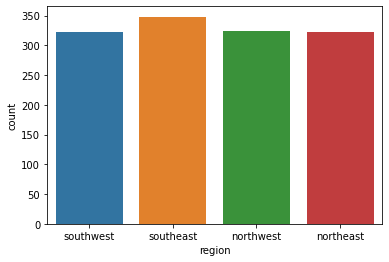

In [36]:
sns.countplot(data = df2, x='region')

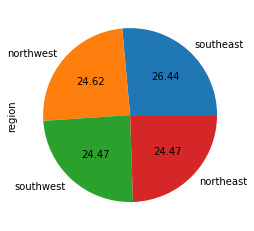

In [37]:
df2['region'].value_counts().plot(kind = 'pie', autopct='%.2f')

**NOTE: autopct is a string used to label the wedge with their numerical value.**

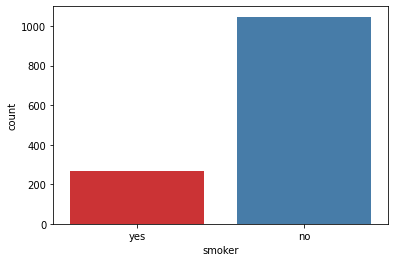

In [38]:
sns.countplot(data = df2, x='smoker', palette="Set1")

**NOTE- palettes function for working with color**

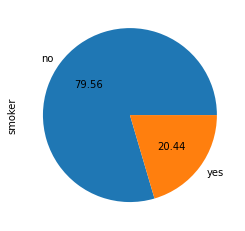

In [39]:
df2['smoker'].value_counts().plot(kind='pie', autopct='%.2f')

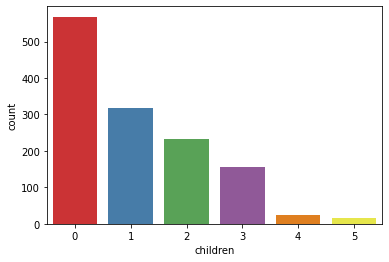

In [40]:
sns.countplot(data = df2, x='children', palette="Set1")

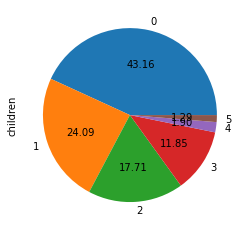

In [41]:
df2['children'].value_counts().plot(kind='pie', autopct='%.2f')

In [42]:
sns.set_style('darkgrid')#gird background

## **Numerical**

**Histogram**

**Distplot**

**Boxplot**

**age, bmi, charges**

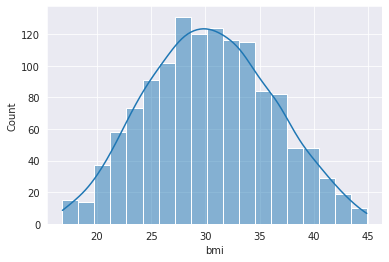

In [43]:
sns.histplot(data = df2, x = 'bmi',kde = True)#Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variabel

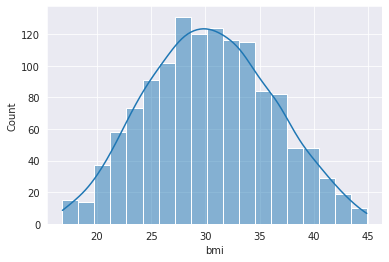

In [44]:
sns.set_style('darkgrid')
sns.histplot(x='bmi', data=df2,kde=True)


**using hist plot on numerical feature we can catigorize the values.**

**A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



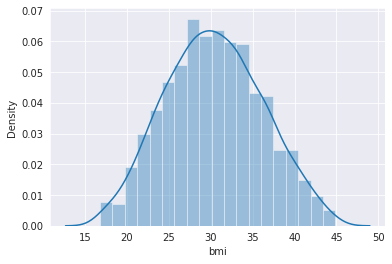

In [45]:
sns.distplot(df2['bmi'], hist = True, kde = True)

**Boxplot is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles.**

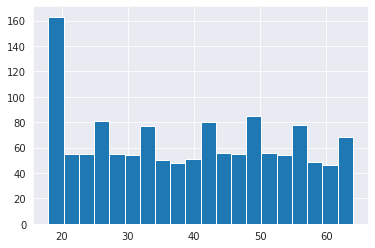

In [46]:
plt.hist(df2['age'], bins=20)
plt.show()


**BINS-A histogram displays numerical data by grouping data into "bins" of equal width .Each bin is plotted as a bar whose height corresponds to how many data points are in that bin**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



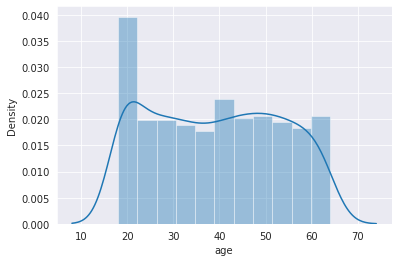

In [47]:
sns.distplot(df2['age'])

# Bivariate & Multivariate Analysis

**(Numerical - Numerical)**

**(Numerical - Categorical)**

**(Categorical - Categorical)**

# Numerical vs Numerical

**Scatter**


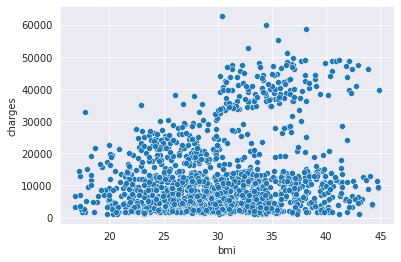

In [48]:
sns.set_style('darkgrid')
sns.scatterplot(data =df2, x='bmi', y='charges')

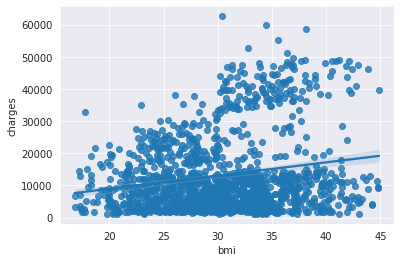

In [49]:
sns.regplot(data = df2, x='bmi', y='charges')

# Numerical vs Categorical

**BarPlot**

**BoxPlot**

**Distplot**

**histplot**

**BarPlot**

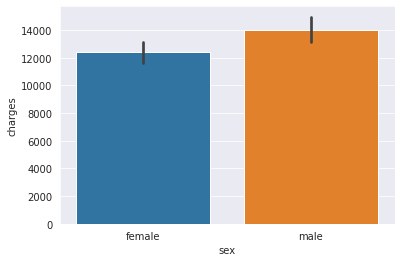

In [50]:
sns.barplot(data = df2, x = 'sex', y = 'charges')

**Boxplot**

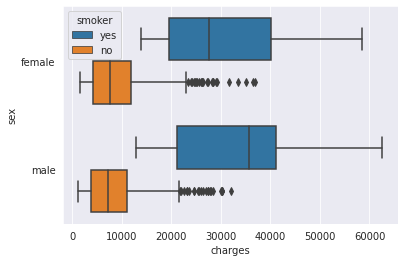

In [51]:
sns.boxplot(data = df2, x='charges', y='sex', hue='smoker')

**The hue parameter is used for Grouping variable that will produce points with different colors**

**Distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



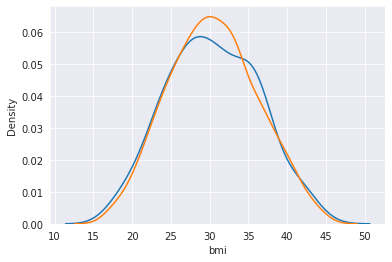

In [52]:
sns.distplot(df2[df2['smoker']=='yes']['bmi'], hist=False)
sns.distplot(df2[df2['smoker']=='no']['bmi'], hist=False)

plt.show()

# Categorical vs Categorical

**Heatmap, clustermap**

**A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.**

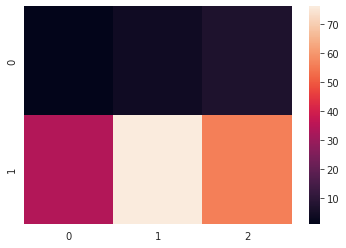

In [ ]:
array = np.array([
                  [1, 4, 7], 
                  [34, 76, 56]
                ])


sns.heatmap(array)

**crosstab**

**crosstab is a table showing the relationship between two or more variables**

---



In [53]:
ctab = pd.crosstab(df2['children'], df['sex'])
ctab

sex,female,male
children,,
0,287,281
1,156,161
2,116,117
3,77,79
4,11,14
5,7,10


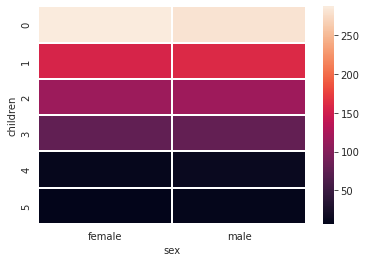

In [54]:
sns.heatmap(ctab, linewidth = 1)#linewidths The user uses this parameter to set the width of the line and it is an optional parameter.


**clustermap() method uses a hierarchical clusters to order data by similarity.**

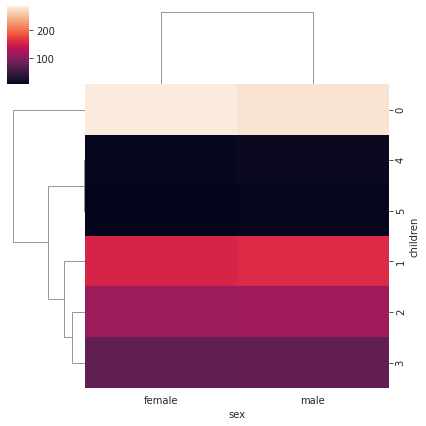

In [55]:
sns.clustermap(pd.crosstab(df2['children'], df['sex']), figsize=(6, 6))

# Pairplot


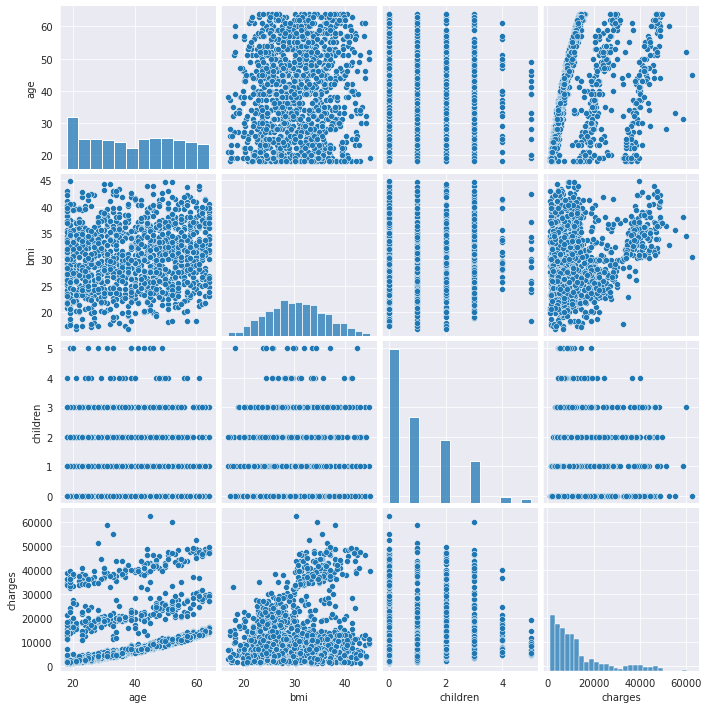

In [56]:
sns.pairplot(df2)

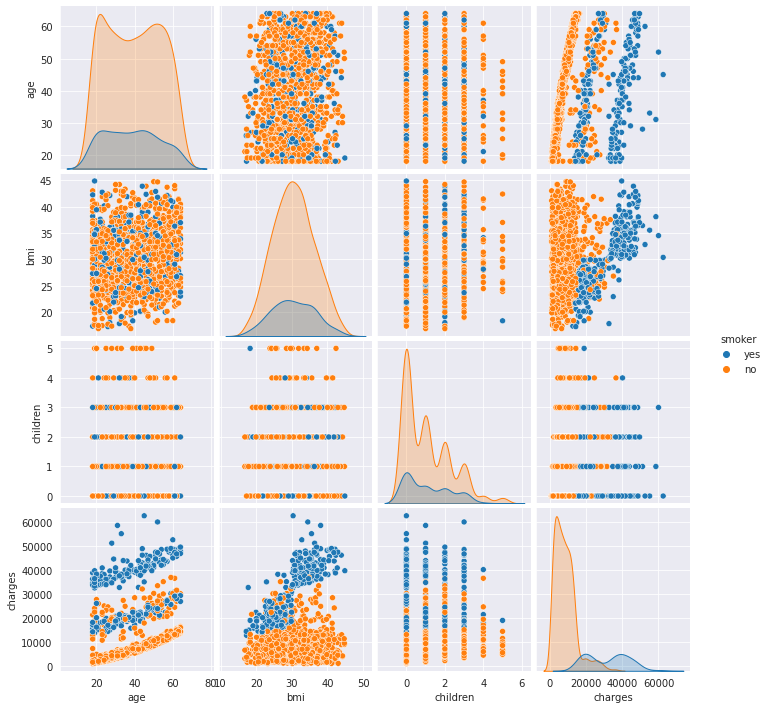

In [57]:
sns.pairplot(df2, hue='smoker')
